In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas
import geoplot


orders_df = pd.read_csv("BigSupplyCo_Orders.csv", index_col=0)
products_df = pd.read_csv("BigSupplyCo_Products.csv", index_col=0)
customers_df = pd.read_csv("BigSupplyCo_Customers.csv", index_col=0)
engtoiso = pd.read_csv("engtoiso3.csv", index_col=0).dropna(how='all', axis='columns')






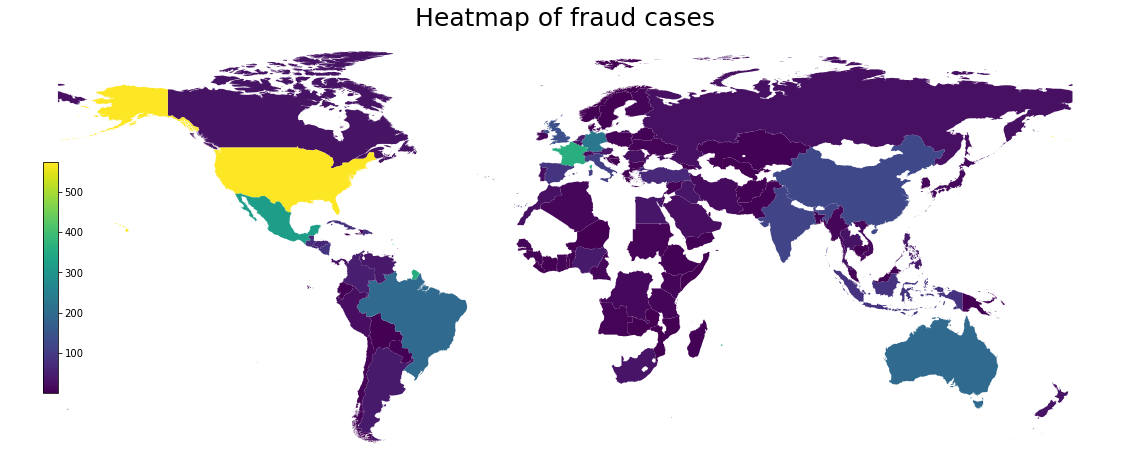

In [181]:
countries = np.unique(pd.Series(orders_df['Order Country'].ravel()).dropna().values).tolist()


engCountries = ['Afghanistan', 'Albania', 'Germany', 'Angola', 'Saudi Arabia', 'Algeria', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh', 'Barbados', 'Bahrain', 'Belize', 'Benin', 'Belarus', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi' , 'Bhutan', 'Belgium', 'Cambodia', 'Cameroon', 'Canada', 'Chad', 'Chile', 'China', 'Cyprus', 'Colombia', 'South Korea', 'Costa Rica ', 'Ivory Coast', 'Croatia', 'Cuba', 'Denmark', 'Ecuador', 'Egypt', 'El Salvador', 'United Arab Emirates', 'Eritrea', 'Slovakia', 'Slovenia' , 'Spain', 'United States of America', 'Estonia', 'Ethiopia', 'Philippines', 'Finland', 'France', 'Gabon', 'Georgia', 'Ghana', 'Greece', 'Guadeloupe', 'Guatemala', 'French Guiana', 'Guinea', 'Equatorial Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hong Kong', 'Hungary', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Iran', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kyrgyzstan', 'Ku wait', 'Laos', 'Lesotho', 'Liberia', 'Libya', 'Lithuania', 'Luxembourg', 'Lebanon', 'Macedonia', 'Madagascar', 'Malaysia', 'Mali', 'Morocco' , 'Martinique', 'Mauritania', 'Moldova', 'Mongolia', 'Montenegro', 'Mozambique', 'Myanmar', 'Mexico', 'Namibia', 'Nepal', 'Nicaragua', 'Nigeria', 'Norway', 'New Zealand', 'Niger', 'Oman', 'Pakistan', 'Panama', 'Papua New Guinea', 'Paraguay', 'Netherlands', 'Peru', 'Poland', 'Portugal', 'Qatar', 'United Kingdom of Great Britain and Northern Ireland', 'Central African Republic', 'Czech Republic', 'Congo, Democratic Republic of the', 'Dominican Republic', 'Republic of Gambia', 'Republic of Congo', 'Rwanda' , 'Romania', 'Russia', 'Senegal', 'Serbia', 'Sierra Leone', 'Singapore', 'Syrian Arab Republic', 'Somalia', 'Sri Lanka', 'Swaziland', 'South Africa', 'Sudan' , 'South Sudan', 'Sweden', 'Switzerland', 'Suriname', 'Western Sahara', 'Thailand', 'Taiwan', 'Tanzania', 'Tajikistan', 'Togo', 'Trinidad and Tobago', 'Turkmenistan', 'Turkey', 'Tunisia', 'Ukraine', 'Uganda', 'Uruguay', 'Uzbekistan', 'Venezuela', 'Vietnam', 'Yemen', 'Djibouti', 'Zambia', 'Zimbabwe']

countryDict = dict(zip(countries, engCountries))
#fig, axe = plt.subplots(figsize = (40,5))
fraud_df = orders_df.loc[(orders_df['Order Status'] == 'SUSPECTED_FRAUD')]
#print(countryLookup_df.loc[countryLookup_df['Country'] == 'Afghanistan'][['Latitude','Longitude']].values[0])

countryFrauds = fraud_df.rename(columns={'Order Status':'Fraud Order Count'})[['Fraud Order Count','Order Country']]
countryFrauds_df = countryFrauds.groupby(['Order Country']).count()

ecdf=[]

for index, row in countryFrauds_df.iterrows():
    ecdf.append(countryDict[index])
world = geopandas.read_file('world.shp')
countryFrauds_df['en_countries'] = ecdf
countryLookup_df = pd.read_csv("countries.csv", index_col=0)

countryFrauds_df.join(countryLookup_df, on = 'en_countries')
countryFrauds_df = countryFrauds_df.merge(engtoiso, how = 'left', left_on = 'en_countries', right_on='name')


countryFrauds_df
countryFrauds_df = countryFrauds_df.merge(world, how = 'inner', left_on = 'alpha-3', right_on='ADM0_A3')
countryFrauds_df
countryFrauds_df = geopandas.GeoDataFrame(countryFrauds_df[['Fraud Order Count', 'geometry']].copy())
countryFrauds_df

title = 'Heatmap of fraud cases'
col = 'Fraud Order Count'

vmin = countryFrauds_df[col].min()
vmax = countryFrauds_df[col].max()

fig, ax = plt.subplots(1, figsize=(20, 8))
ax.set_title(title, fontdict={'fontsize': '25', 'fontweight': '3'})

# Remove the axis
ax.axis('off')
countryFrauds_df.plot(column=col, ax=ax, linewidth=1,)

            
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap='viridis')

# Empty array for the data range
sm._A = []

# Add the colorbar to the figure
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)
